In [1]:
import pandas as pd
from preprocessing import preprocess_data
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from notebooks_classification.classification import compute_classifier
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import accuracy_score

## Data importation

In [2]:
df = pd.read_csv('../data/Spotify_train_dataset.csv')

features_columns = ['danceability', 'energy', 'key', 'loudness', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'time_signature']
label = ['genre']

## Preprocess

### Without Strandardization

In [4]:
df_normal, labels = preprocess_data(df, features_columns, label, z_score=False, standardize=False)

#Encode data
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

------------------------------------------
            Preprocessing data            
------------------------------------------
Get dataset
Shape of the data to process : (31728, 20)
------------------------------------------
Extract labels ...
Extract inputs ...
------------------------------------------
Data shape after preprocessing : (31728, 13)
Labels shape : (31728,)
Return dataset(s) ...
Preprocessing finished
------------------------------------------


### With Strandardization

In [3]:
df_stand, labels = preprocess_data(df, features_columns, label, z_score=False, standardize=True)

#Encode data
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

------------------------------------------
            Preprocessing data            
------------------------------------------
Get dataset
Shape of the data to process : (31728, 20)
------------------------------------------
Extract labels ...
Extract inputs ...
Center and reduce inputs ...
------------------------------------------
Data shape after preprocessing : (31728, 13)
Labels shape : (31728,)
Return dataset(s) ...
Preprocessing finished
------------------------------------------


In [5]:
# def compute_classifier(x_train, y_train, model) :
#     #create kfold
#     kfold = KFold(n_splits = 10, random_state = 18, shuffle = True)
#
#     #Predict y with cross validation
#     y_pred = cross_val_predict(model, x_train, y_train, cv=kfold)
#
#     #Compute metrics
#     accuracy = accuracy_score(y_train, y_pred)
#     print("Accuracy : " + str(accuracy))
#
#     return y_pred

### Computing

In [8]:
print("GaussianNB")
GNB = GaussianNB()
print("Without Standardization : ")
y_pred_normal = compute_classifier(df_normal, labels_encoded, GNB)
print("\nWith Standardization : ")
y_pred_stand = compute_classifier(df_stand, labels_encoded, GNB)

GaussianNB
Without Standardization : 
Accuracy : 0.49268784669692384

With Standardization : 
Accuracy : 0.5891011094301564


In [9]:
print("GaussianNB param changed")
GNB = GaussianNB(var_smoothing=0)
print("Without Standardization : ")
y_pred_normal_2 = compute_classifier(df_normal, labels_encoded, GNB)
print("\nWith Standardization : ")
y_pred_stand_2 = compute_classifier(df_stand, labels_encoded, GNB)

GaussianNB param changed
Without Standardization : 
Accuracy : 0.5891011094301564

With Standardization : 
Accuracy : 0.5891011094301564


In [11]:
print(classification_report(labels_encoded, y_pred_stand, target_names=le.classes_))

                 precision    recall  f1-score   support

      Dark Trap       0.53      0.29      0.37      3378
            Emo       0.41      0.53      0.46      1262
         Hiphop       0.46      0.33      0.39      2255
            Pop       0.16      0.26      0.20       336
            Rap       0.29      0.43      0.35      1420
            RnB       0.30      0.27      0.28      1605
     Trap Metal       0.38      0.21      0.27      1474
Underground Rap       0.44      0.51      0.48      4378
            dnb       0.92      0.96      0.94      2213
      hardstyle       0.74      0.78      0.76      2178
      psytrance       0.76      0.87      0.81      2214
      techhouse       0.79      0.88      0.83      2254
         techno       0.80      0.74      0.77      2226
         trance       0.61      0.73      0.66      2275
           trap       0.70      0.68      0.69      2260

       accuracy                           0.59     31728
      macro avg       0.55   

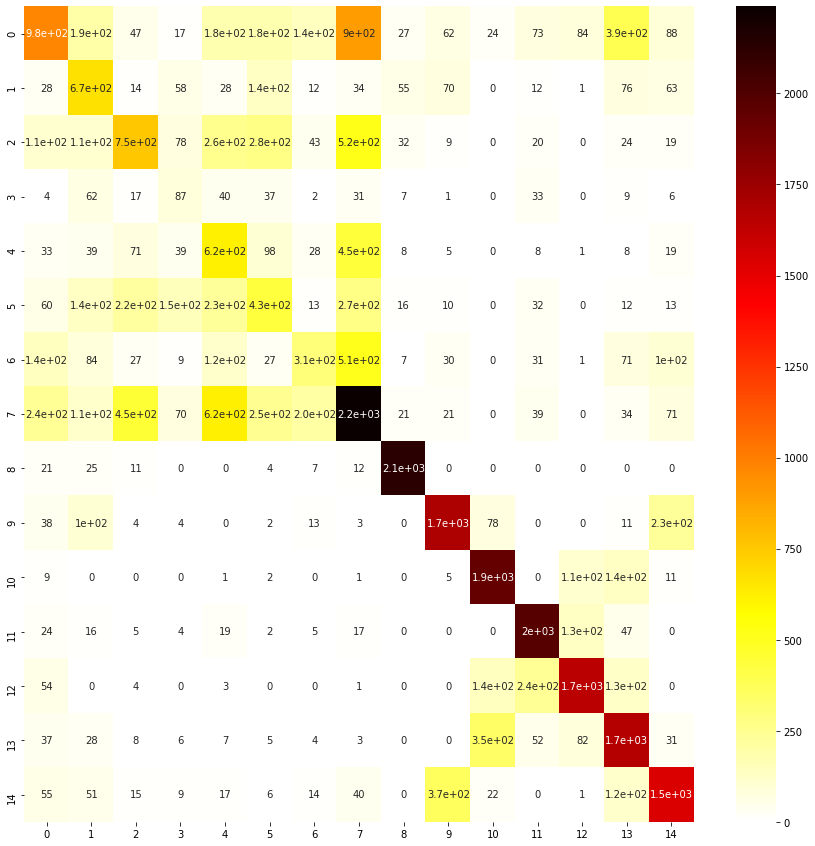

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cf_matrix = confusion_matrix(labels_encoded, y_pred_stand)

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(cf_matrix, annot=True, ax=ax, cmap='hot_r')
plt.show()